In [8]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [9]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
m = 1.
c = 1.
theta_e = 10.
#nu_c = 1
B = 10.
e = 1


#constants in Gaussian cgs units (values from harmony)
#m = 9.1093826e-28
#c = 2.99792458e10
#e = 4.80320680e-10
#B = 30.0
#n_e = 100000.


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
#nu_c = 1.
nu = 1. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)

#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = 0.5
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))

cos_xi = np.arange(-1, 1, 0.1)
gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f


n_dn = (nu / nu_c) * abs(np.sin(theta))
#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
C = 10.

#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans
    

In [10]:
def K_s(n, gamma, cos_xi):
    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

#def Operator_D_gamma(gamma):
    
#    beta = np.sqrt(1. - 1./gamma**2.)
#    prefactor = (np.pi * nu / (m * c**2)) * (n_e / (beta * theta_e * special.kn(2., 1./theta_e)))
#    body_1_body = (gamma * (gamma**2 - 1)**(- 1./2.) * gamma - np.sqrt(gamma**2 - 1.)) / (gamma**2)
#    body_1_tail = np.exp(- gamma / theta_e)
#    body_2_body = (np.sqrt(gamma**2 - 1) / gamma) * (- 1./theta_e)
#    body_2_tail = np.exp(- gamma/theta_e)
#    body = body_1_body * body_1_tail * body_2_body * body_2_tail
#    f = prefactor * body
    
#    return derivative_gamma_term

def Operator_D_gamma(gamma):
    prefactor = (np.pi * nu / (m * c**2)) * (n_e / (theta_e * special.kn(2., 1./theta_e)))
    body = (- 1./theta_e) * np.exp(- gamma / theta_e)
    f = prefactor * body
    return f



#print Operator_D_gamma(10)

#def Operator_D_cosxi(gamma, cos_xi):
#    beta = np.sqrt(1. - 1./gamma**2.)  
#    prefactor = 2. * np.pi * nu * (beta * np.cos(theta) - cos_xi) / (m * c**2 * beta * np.sqrt(gamma**2 - 1)) 
#    derivative_prefactor = (1./(gamma**2 * beta)) * (n_e / (4. * np.pi * theta_e))
#    derivative_body = gamma * np.sqrt(gamma**2 - 1) / special.kn(2., 1./theta_e)
#    derivative_tail = np.exp(- gamma / theta_e)
#    derivative_cosxi_term = prefactor * derivative_prefactor * derivative_body * derivative_tail
#    return derivative_cosxi_term

#print Operator_D_cosxi(10, 0.5)

def delta_function(n, gamma, cos_xi):
    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    print argument
    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp( - argument**2 / epsilon**2)
    return f

#print delta_function(1, 10, 0.5)

def Eq_48_integrand(n, gamma, cos_xi):
    beta = np.sqrt(1. - 1./gamma**2.)    
    prefactor = - c * e**2 / (2. * nu)
    body_1 = delta_function(n, gamma, cos_xi) * gamma**2 * beta
    body_2 = Operator_D_gamma(gamma) * K_s(n, gamma, cos_xi)
    f = prefactor * body_1 * body_2
    return f


    

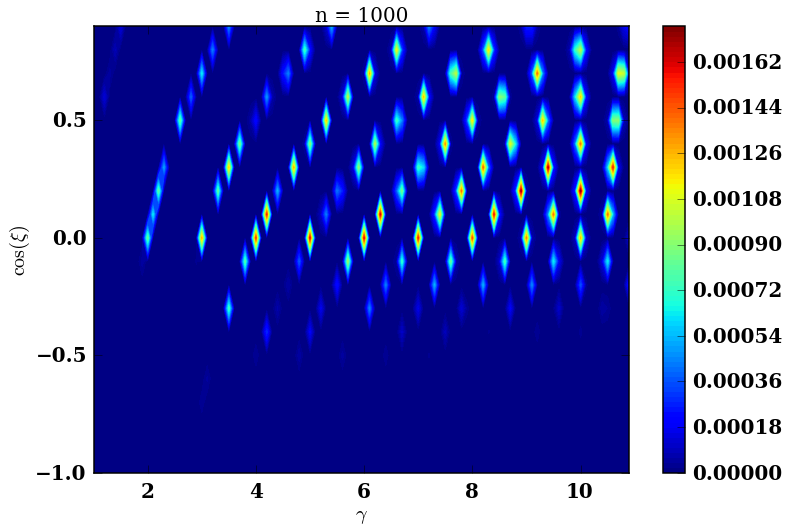

In [13]:
gamma_mesh, cos_xi_mesh = np.meshgrid(gamma, cos_xi)

n = 1000

total_integrand = 0
for i in xrange(n):
    total_integrand = total_integrand + Eq_48_integrand(i, gamma_mesh, cos_xi_mesh)

pl.figure(figsize=(12, 8))
pl.contourf(gamma_mesh, cos_xi_mesh, total_integrand, 100)
pl.xlabel('$\\gamma$')
pl.ylabel('$\\cos(\\xi)$')
pl.colorbar()
pl.title('n = '+str(n))